## OPD PORTFOLIO 2:  Text Mining in The Guardian
Gress-Wright tsp932
5 January, 2020

Instructions
  For this assignment you will:
1. Open, import, and/or read a text collection
2. Pre-process and describe your collection
3. Select articles using a query
4. Model and visualize the topics in your subset


0. ABOUT TEXT MINING

In their introduction to text mining, Ignatow and Milhacea (Ignatow and Milhacea, 2018: 3-5) set text mining in context.  Text mining is the use of computer-based methodologies to collect and analyze digital texts, whether born digital (such as Twitter) or digitized print (such as scanned print texts). It originates in computer science and is used, for example, in marketing.  Text analysis, which dates back as far as the Middle Ages, is the “systematic analysis of word use patterns in text” combining statistical methods and humanistic interpretation, such as content analysis of transcribed interviews or discourse analysis of print texts.  It is common in the social sciences and humanities.  The two are now converging.  Text mining exploits the speed and precision of computers, while text analysis employs the subtlety and context knowledge of humans.  The two complement each other.


Both text mining and text analysis make use of subjective human judgment and interpretation.  The difference is where in the process it comes in.  In text analysis it early, for example in the close study of historical documents.  In text mining it comes later.  Mützel argues, for example, that while the analyst can topic modelling, a text mining method, to gain “macroscopic insights into the development of entire fields” he or she still needs field knowledge to interpret the results (Mützel, 2015, cited in Ignatow and Milhacea, 2018: 213).


This Portfolio 2 makes use of two probabilistic models in text mining.  1) Latent Semantic Analysis (LSA). LSA is used to produce a document-term matrix where each cell contains frequency or weighted frequency of a given term in a document in a collection.  Weights are based on the vector-space modelling of terms in documents relative to a query, in which both the frequency of a term in the collection, the size of the collection and the frequency of a term in a document are taken into account (Ignatow and Milhacea, 2018; van der Sluis, 2019a).   2) Latent Dirichlect Allocation (LDA) models topics. This is a statistical model of all the terms in a collection, viewed as a “bag of words”, which is used to tease out clusters of related terms or topics. It is inductive in that the topics are not pre-selected as a query, but emerge from the statistical analysis itself (Ignatow and Milhacea, 2018; van der Sluis, 2019b).


1. OPEN, IMPORT AND/OR READ A TEXT COLLECTION
DOWNLOAD GUARDIAN'S TEXT DATASET USING GUARDIAN'S API
NOTE:  THE FOLLOWING CODE IS PARTLY FROM THE GUARDIAN WEB PAGE
JGW user key    b37a10ff-7282-40bf-a60f-bacb07a22cd7
Script to use to download datafile (with parameters for key, dates, etc. filled in).
Script is derived from the Guardian's API documentation page (saved as .pdf)


In [306]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta


This creates two subdirectories called "theguardian" and "collection"


In [307]:
ARTICLES_DIR = join('theguardian', 'collection')
makedirs(ARTICLES_DIR, exist_ok=True)


Sample URL
http://content.guardianapis.com/search?from-date=2016-01-02&
to-date=2016-01-02&order-by=newest&show-fields=all&page-size=200
&api-key=your-api-key-goes-here
Change this for your API key:


In [308]:
MY_API_KEY = 'b37a10ff-7282-40bf-a60f-bacb07a22cd7'
API_ENDPOINT = 'http://content.guardianapis.com/search'
my_params = {
        'from-date': "", # leave empty, change start_date / end_date variables instead
        'to-date': "",
        'order-by': "newest",
        'show-fields': 'all',
        'page-size': 200,
        'api-key': MY_API_KEY
}

Day iteration from here:
http://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates
For our collections we choose 1 January 2019 as a start date and 28 October 2019 as end date.  


In [309]:
start_date = date(2019, 1, 1)
end_date = date(2019, 10, 28)
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']
#
        with open(fname, 'w') as f:
            print("Writing to", fname)
#       Saving the actual article files to disk ("w" means write)
            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2))


READING THE JSON FILES
Read JSON files into two variables: a list of ids and a list of plain texts.


In [310]:
import json
import os


OS means operating system.  OS enables us to read data from the net and then save to own hard disk with a file name. 
I update to the directory that contains my json files
The trailing "/" creates a file path on the hard disk to a folder named "theguardian" and a subfolder named "collection".


In [311]:
directory_name = "theguardian/collection/"
ids = list()
guard_texts = list()


This creates two empty lists:  "ids" and "guard_texts".  Now we can begin to work with them.
First we create a for loop to load the data (articles and associated id's for time period). We specify that we want the texts and ids of articles from the "Opinion" section only.

NOTE: We "append" rather than "extend" because each item i.e. article) is a single item. If each article were instead a list, and we wanted each item in that article list appended one by one,we would have to use "extend" not "append".


In [312]:
for filename in os.listdir(directory_name):
# We now go to the folder and read each file of the type "json".
    if filename.endswith(".json"):
        # This downloading pro
        with open(directory_name + filename) as json_file:
            
            loopdata = json.load(json_file)
            # The data variable "loopdata" is created in Python with the content from 
            # the datafile on the hard disk-- for the purposes of reading the Guardian's 
            # .json files into the program and stored in the program's memory 
            # so it can be worked with.            
            # This is done by means of the following "for loop", which reads the 
            # respective id's and text for each article.  The file now becomes 
            # an appended list. 
            
        for article in loopdata:
                id = article['id']
                fields = article['fields']
                doc_type = article['type']
                section_id = article['sectionId']
                section_name = article['sectionName']
                if section_name == 'Opinion':
                    # only artilce from the opnion asection are appended to texts 
                    text = fields['bodyText'] if fields['bodyText'] else ""
                    # if the field is labelled "body text" then it is appended to the 
                    # "texts" list, if not, then a blank is appended
                    ids.append(id)
                    guard_texts.append(text)


First glance at the data, how many indices (id's) and associated texts:
 

In [313]:
print("Number of ids: %d" % len(ids))
print("Number of texts: %d" % len(guard_texts))
 

Number of ids: 5533
Number of texts: 5533


The list has 5533 indices ("id's") i.e 5533 texts
Next step is to test print a selected article
print("Article 100 reads as follows:  ",texts[100]) 
This was successful, so is not coded and outputted here for reasons of space.


2. PRE-PROCESS AND DESCRIBE YOUR COLLECTION
Derive a document-term matrix for your collection. Explain which pre-processing steps you take, for example do you: limit the vocabulary size, apply a token pattern, remove stopwords, or use tf-idf weighting? Describe the characteristics of your collection. How many documents, what is the average length of the documents, how many terms before/after pre-processing, how much words in total, etc. Show that you’re getting “good” terms for further analysis."


2.1 Imports

In [314]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
from pandas import DataFrame 


2.2 Remove stop words (use nltk’s stopwords)
Stop words removes many of frequent but insignificant terms common to all texts, such as "of" "the" "but".  This helps keep a focus on truly significant words
N.B. "stop words" fram nltk is a better version of stopwords than sklearn's. 
 

In [315]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as sw


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jessica\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2.3 Import CountVectorizer
Initialize CountVectorizer, i.e. create a copy of the "tool box" called 
"model_vect" with parameters and training on the data yet, creating a container with working machinery We specify the contents of the tool box, i.e. the parameters of model_vect:  we use English; and the token pattern is defined as a string with a) characters upper or lower case (no numbers); b) where if separated by a hyphen are still one token; and c) there is a minimum of two characters but no maximum number of characters in a token.


In [316]:
from sklearn.feature_extraction.text import CountVectorizer
model_vect = CountVectorizer(stop_words=sw.words('english'), token_pattern=r'[a-zA-Z\-][a-zA-Z\-]{2,}')


The vocabulary contains terms (i.e. "features", "tokens", "words") and reamins attached to the model_vect vectorisor, not to the sparse array "guard_vect_array" which we will make next. 

NOTE: I do not yet limit the vocabulary to 10,000 unique terms because a future query term might be excluded by that.


Apply a token_pattern and test output.


In [317]:
model_vect


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

  The list of stop-words looks right.

2.4 Fit and transform the data into a document term matrix


In [318]:
guard_vect_array = model_vect.fit_transform(guard_texts)


We can fit and transform at same time because we will not be adding more 
data later--this is all the data we are going to be working with.


2.5 Describe the resulting matrix and contents
2.5.1 Describing the matrix as an object
Printing the shape of the array gives the number of documents (rows) and terms (columns).  Literally, it gives the co-ordinates of a cell, the "rows" being the document indices and the "columns" being the term indices.  The value in each cell is the absolute count for that term in that document.  

In [319]:
print('Shape of guard_vect_array: (%i, %i)' % guard_vect_array.shape)
guard_vect_array.shape


Shape of guard_vect_array: (5533, 78832)


(5533, 78832)

2.5.2 Printing the matrix type


In [320]:
print(type(guard_vect_array))

<class 'scipy.sparse.csr.csr_matrix'>


Guard_vect_array is a sparse matrix., i.e. to save memory, all values of 0 are "left out".


2.5.3 How sparse is the matrix. 


In [321]:
print("The sparsity of this matrix : ")
dense_count = np.prod(guard_vect_array.shape)
zeros_count = dense_count - guard_vect_array.size
print("zeros_count / dense_count")
print(zeros_count / dense_count)

The sparsity of this matrix : 
zeros_count / dense_count
0.9958069680703534


2.6  Taking a random sample

The purpose is to make sure that the matrix terms make some kind of sense.

In [322]:
import random
random.sample(model_vect.get_feature_names(), 10)

['spook',
 'dissolved',
 'elba',
 'moaning',
 'california',
 'nappy',
 'caffiendmelbourne',
 'snark',
 'face-both-ways',
 'tax-rate']

Yes, they do make sense. Code returned 10 random terms:

2.8 How long are the texts? 
We cannot do len(guard_vect_array) but the number of documents is 5533  len(guard_texts))

In [323]:
total = 0
for text in guard_texts:
    total = total + len(text)
total_docs=(len(guard_texts))
print ('Total number of characters is ' , total, '; number of docs is', total_docs)


Total number of characters is  28082502 ; number of docs is 5533


2.9 The most frequent words

2.9.1 Find the indexes of the top-10 most used words in the collection.

To do this, one must first identify the 10 most used words (terms) in the entire collection. To do this requires that we use sum and .A1 to sum the absolute counts in each column (axis=0)to get each column total.  This results in an array of one row with 78.832 columns, each new cell the sum of all the counts for the term.  

We then use (-sums_by_term).argsort to make a new list of the all the 78000 indices in descending order (top to bottom) by size of sum. To take the top 10 sums, i.e. the top 10 terms, we take only the slice [:10], which gives an array of 10 indices of the top-10 most used words. 


In [324]:
sums_by_term = guard_vect_array.sum(axis=0).A1
top_idxs = (-sums_by_term).argsort()[:10]
top_idxs


array([51518, 77986, 48970,  8645, 46782, 23183, 42534, 39833, 50939,
       70600], dtype=int64)

2.10 Give the WORDS belonging to the top-10 indexes.
Use an inverted vocabulary found in Count_vectorizer.

N.B. because argsort lists the original indices of the top 10 terms, the associated feature names are still linked.


In [325]:
inverted_vocabulary = dict([(idx, word) for word, idx in model_vect.vocabulary_.items()])
top_words = [inverted_vocabulary[idx] for idx in top_idxs]
print("Top words: " , top_words)


Top words:  ['people', 'would', 'one', 'brexit', 'new', 'even', 'may', 'like', 'party', 'time']


2.11 Describing the documents:  average words, longest, shortest

In [326]:
total_words = 0
hi=len(guard_texts[0])
lo=hi
for text in guard_texts:
    words=text.split() 
    x=len(words)
    if x>hi:
        hi=x
    if (x<lo) and (x>0):
            lo=x
    total_words = total_words + x
    average_words=(total_words/len(guard_texts))
print ("the average document contains", average_words , "words") 
print ("the longest is ", hi, " words, the shortest is ", lo, " words" )

the average document contains 852.8807157057654 words
the longest is  5073  words, the shortest is  40  words


2.12 Reflections on the pros and cons of absolute word counts

Absolute word counts can contribute to misleading analyses when documents vary 
significantly in length.  One document may have 10x the references to women as another simply because it is 10x longer. 

Comparing the length of documents may show something about how far we can trust absolute word counts in this case.
  

We test by first measuring the total number of words (including repetitions)in the collection. Dividing by the number of documents gives us the mean number of words in each document.  To find the total each document is 'split' into words. 

The important consideration is the difference in lengths between documents  If there is a wide variation in length, it is more misleading to rely on absolute counts than if all the documents are the same length.


To find the shortest and longest documents, the highest and lowest word counts are kept as a running comparison, starting with the number of words in the first document.  To ensure that the for loop does keep going until
it finds the lowest count above zero, we code so that as the loop executes the 'total_words' variable grows with the number of words in each document.  To find the average this total is divided by the total number of documents . We cannot do len(guard_vect_array) but the number of documents is found by len(guard_texts)).


2.13 Weighting the document and term frequencies: reflecting on and calculating TF-IDF 

The next step is to apply LSA to create a document-term matrix with weights in the cells, not absolute counts (Term Frequency-Inverse Document Frequency, TF-IDF).  We do this to account for the fact that longer documents have higher words counts. Zipf's law states that the frequency of  of a word in a collection decreases exponentially with its frequency rank. Longer documents have disproportionately larger vocabularies (Heap's law). Weighting the terms by taking the size of both the collection and the document into account helps counteract this.
 

A TF-IDF weight is composed of TWO terms. 

a) The first, TF, is the NORMALIZED term frequency in A GIVEN DOCUMENT, i.e. the number of time a given term appears in a single given document, divided by the LENGTH of the document measured in words.

b) The second,IDF, inverse document frequency, is a way to measure the IMPORTANCE of a given term in the COLLECTION. Taking the INVERSE is a way to assign more importance to rare and less to common terms.  So the more common a term in the collection as a whole, the less weight it has vis á vis a given document.


In [327]:
from sklearn.feature_extraction.text import TfidfTransformer
# Apply TF-IDF weighting 
model_tfidf = TfidfTransformer()
guard_tfidf = model_tfidf.fit_transform(guard_vect_array)
print(' ')
freqs = guard_tfidf.mean(axis=0).A1
top_idxs2 = (-freqs).argsort()[:10]
print(top_idxs2)
inverted_vocabulary = dict([(idx, word) for word, idx in model_vect.vocabulary_.items()])
weighted_top_words = [inverted_vocabulary[idx] for idx in top_idxs2]
print("Weighted top words: " , weighted_top_words)
top_weights = []
for f in top_idxs2 :
    top_weights.append(freqs[f])
df3=pd.DataFrame()
df3['Word']=weighted_top_words
df3['Weights']=top_weights
print (df3)
 

 
[ 8645 51518 77986 50939 38372 48970 72073 36745 42534 17056]
Weighted top words:  ['brexit', 'people', 'would', 'party', 'labour', 'one', 'trump', 'johnson', 'may', 'deal']
      Word   Weights
0   brexit  0.029563
1   people  0.026762
2    would  0.023941
3    party  0.021915
4   labour  0.021755
5      one  0.021182
6    trump  0.020271
7  johnson  0.019642
8      may  0.018837
9     deal  0.018309


We can see, that in Opinion over the given period, terms associated with Brexit and party politics dominated.

3. SELECT ARTICLES USING A QUERY

We are going to select texts based on a query.  These texts will then be analyzed, first using TF-IDF, returning document-term matrices (counts and weights); second using LDA for topic modelling.
 

3.1 Creating the basic LDA matrix

Before we can use the second method, topic modelling using LDA, we must first create an LDA matrix based on the entire collection.

a) We import LDA.  
b) We create the variable "model_lda" with parameters n_components=4 (nr. of topics) and random_state=0 (so we get reproducible results on each run). NOTE We choose 4 topics to start with.  The selection from a base collection of 5533 documents may be too small to sustain a really large number of topics (like 25).  Anything less than 4 might risk missing significant topics. 4 can give a good overview.
c) We then create the variable guard_lda where we use LDA to fit and transform the guard_vect_array we have already.
d) We create a LDA matrix with headings for rows (documents in our base collection) and columns (topics).
e) We find the shape of the matrix.

Each document is considered to have a small set of topics and each topic frequently uses only a small set of terms.  The distribution of terms in a given topic is the topic's distinctive fingerprint or signature.  Terms may be found in more than one topic but the overall signature is not the same.


In [328]:
from sklearn.decomposition import LatentDirichletAllocation
model_lda = LatentDirichletAllocation(n_components=4, random_state=0)
guard_lda = model_lda.fit_transform(guard_vect_array)
print('The shape of the LDA matrix is %i rows and %i columns', np.shape(guard_lda)) 


The shape of the LDA matrix is %i rows and %i columns (5533, 4)


3.2 We then create our query.  We choose a named entity ("Ireland") because it gets a more consistent selection to model.  Our research questions are both inductive. 

RESEARCH QUESTIONS:  
For the articles in the Opinion Section of The Guardian during the period 1.1.2019-10.28.2019 
    1. What terms are associated with the query "Ireland".  What weights do the terms have?
    2. What are the contents of the top four topics associated with the named entity "Ireland"?

Our hope is that "Ireland" will be much mentioned in the Opinion section of the Guardian during this period.  We hypothesize that in 2019 we may find topics and terms associated with Brexit and Ireland, perhaps related to Northern Ireland, the border there, and/ or the Good Friday Agreement.

3.3 Describing the selection

First we create the selection "Ireland".

In [329]:
selection="Ireland"
print('Our selection of documents is based on the query:', selection)
selection_texts = list()
for text in guard_texts:
    if selection in text:
        selection_texts.append(text)
sample_index= list(range(len(selection_texts)))
print(' ')  
print ('The number of documents in the selection is:', len(selection_texts))  


Our selection of documents is based on the query: Ireland
 
The number of documents in the selection is: 484


Second, we create a new document-term matrix for the selection. 

The reason is that we want to generate lists of most frequent terms, etc. particular to our selection and not the whole Guardian 'Opinion' section. We need a new vocabulary for the selection.  Calling transform on a CountVectorizer returns an array. The returned array does not however have a vocabulary_ attribute. The vocabulary_ attribute is on the CountVectorizer itself. It contains the method "transform" which includes generating a new vocabulary based on the sample.  
 
Creating the matrix also allows us to see the shape of the selection document-term matrix.


In [330]:
sample_vect = model_vect.transform(selection_texts)
print('Sample_vect shape: (%i, %i)' % sample_vect.shape)
sample_vect.shape


Sample_vect shape: (484, 78832)


(484, 78832)

#### 3.4 Analyzing the selection using TF-IDF (weights)


We then create for the sample, using Tfidf, a document-term matrix with weights.
We find the weights for the top 10 terms in the selection Ireland.


In [331]:
sample_tfidf = model_tfidf.transform(sample_vect)
freqs = sample_tfidf.mean(axis=0).A1
top_idxs3 = (-freqs).argsort()[:10]
print(top_idxs3)
inverted_vocabulary = dict([(idx, word) for word, idx in model_vect.vocabulary_.items()])
sample_top_words = [inverted_vocabulary[idx] for idx in top_idxs3]
print(selection,"top words: " , sample_top_words)

sample_freqs = list()
for f in top_idxs3 :
    sample_freqs.append(freqs[f])
df4=pd.DataFrame()
df4['Word']=sample_top_words
df4['Weights']=sample_freqs
print('Weights of the top 10', selection,'words')
print (df4)


[ 8645 35860 36745 17056 47839 42534 77986  8854 35877 50939]
Ireland top words:  ['brexit', 'ireland', 'johnson', 'deal', 'northern', 'may', 'would', 'britain', 'irish', 'party']
Weights of the top 10 Ireland words
       Word   Weights
0    brexit  0.081523
1   ireland  0.080670
2   johnson  0.058862
3      deal  0.054012
4  northern  0.052310
5       may  0.038295
6     would  0.037696
7   britain  0.035794
8     irish  0.035184
9     party  0.029845


3.5 Analyzing selection texts by top 10 terms, using absolute counts. 

We then create for the selection, a document-term matrix with counts. Applying pandas’ dataframe to the selection, we add column names (words) and row names (document indexes).
A dense matrix is created with the selection texts and the count of the top 10 words in put in the matrix - but first the actual top 10 words are printed.


In [332]:
print(' ')    
print("Selection of words from random", selection, "texts")
print(sample_top_words)
sub_matrix5 = guard_vect_array[random_sample_selection, :][:, top_idxs3].todense()
print(' ')
df5=pd.DataFrame(columns=sample_top_words, index=random_sample_selection, data=sub_matrix5 )
print(df5)
print()


 
Selection of words from random Ireland texts
['brexit', 'ireland', 'johnson', 'deal', 'northern', 'may', 'would', 'britain', 'irish', 'party']
 
     brexit  ireland  johnson  deal  northern  may  would  britain  irish  \
481       0        0        1     0         0    2      0        0      0   
0         0        0        0     2         0    0      0        0      0   
372       0        0        0     0         0    0      2        0      0   
210       0        0        0     0         0    0      2        0      0   
350       4        0        1     3         0    1      9        2      0   
216       0        0        0     0         0    0      1        0      0   
54        5        0        0     3         0    1      4        0      0   
134       0        0        0     0         0    2      0        0      0   
246       0        0        0     1         0    0      0        0      0   
2         0        0        0     0         0    0      3        0      0   
402   

3.6 Comparing top 10 weights for selection Ireland with weights for corresponding terms in the collection.  
To determine whether the selected articles are indeed about the query, I compare the selection weights to the overall weights.

In [333]:
print('Selection new weights compared to collection weights')
df_compare=pd.DataFrame()
df_compare['Word']=sample_top_words
df_compare[selection]=sample_freqs
df_compare['Collection']=top_freqs
print(df_compare)

Selection new weights compared to collection weights
       Word   Ireland  Collection
0    brexit  0.081523    0.029563
1   ireland  0.080670    0.026762
2   johnson  0.058862    0.023941
3      deal  0.054012    0.021915
4  northern  0.052310    0.021755
5       may  0.038295    0.021182
6     would  0.037696    0.020271
7   britain  0.035794    0.019642
8     irish  0.035184    0.018837
9     party  0.029845    0.018309


The top 10 weights confirm that "Ireland" returns terms associated both with Ireland (and with Brexit)and that these term weights are heavier in the selection than in the collection as a whole.

As the following loop executes, the 'total_words' variable grows with the number of words in each document.  To find the average this total is divided by the total number of documents . The number of documents is found by len(selection_texts))


In [334]:
total_words = 0
hi=len(selection_texts[0])
lo=hi
for text in selection_texts:
    words=text.split() 
    x=len(words)
    if x>hi:
        hi=x
    if (x<lo) and (x>0):
            lo=x
    total_words = total_words + x

average_words=(total_words/len(selection_texts))
print(" ")
print ("The average",selection,"document contains",average_words , "words.") 
print ("The longest is", hi, "words, the shortest is", lo, "words." )



 
The average Ireland document contains 913.1446280991736 words.
The longest is 6241 words, the shortest is 305 words.


3.6 Visualizing the selection

Word cloud of top 10 terms in the Ireland texts


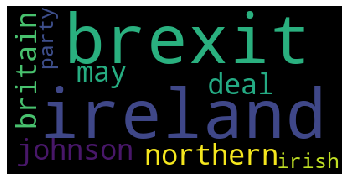

In [335]:
print("Word cloud of top 10 terms in the", selection ,"texts")
import matplotlib.pyplot as plt
%matplotlib inline
#% matplotlib inline # only if using notebooks
from wordcloud import WordCloud
text1= ' '.join(df4['Word'])
wordcloud1 = WordCloud().generate(text1)
# Generate plot
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()


4. MODEL AND VISUALIZE THE TOPICS IN YOUR SUBSET


Model and visualize the topics in your subset using Latent Dirichlet Allocation (LDA) on your pre-processed data.
Note: Set n_components=4 (nr. of topics) and random_state=0 (so we get 
reproducible results on each run).
we have already done: 
from sklearn.decomposition import LatentDirichletAllocation


In [336]:
model_lda = LatentDirichletAllocation(n_components=4, random_state=0)
selection_vect_array = model_vect.fit_transform(selection_texts)
selection_lda = model_lda.fit_transform(selection_vect_array)


4.2 Describe the shape of the resulting matrix.
N.B.  x documents (rows) x 4 topics (columns)
find the top words in the topics and  plot a wordcloud

The shape of the LDA matrix is 5533 rows and  4 columns
Topic 0: brexit, deal, johnson, would, may, britain, party, labour, one, mps, government, parliament, minister, could, prime, even, tory, ireland, vote, european


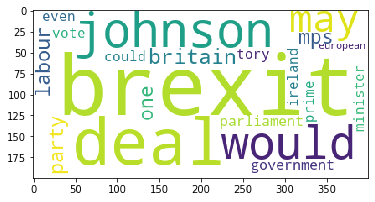

Topic 1: university, people, one, students, years, young, many, time, also, like, would, europe, need, education, world, ireland, make, children, even, year


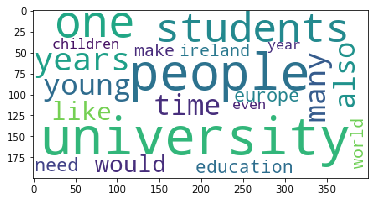

Topic 2: would, one, people, like, ireland, time, many, years, new, even, much, world, get, scotland, britain, war, could, last, little, may


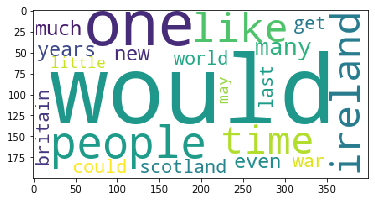

Topic 3: ireland, northern, people, would, one, irish, brexit, government, british, years, many, may, political, border, time, like, also, even, dup, could


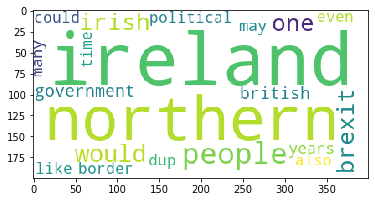

In [337]:
print('The shape of the LDA matrix is %i rows and  %i columns' % np.shape(guard_lda)) 

for i, term_weights in enumerate(model_lda.components_):
    top_idxs_selection = (-term_weights).argsort()[:20]
    top_words_selection = ["%s" % (model_vect.get_feature_names()[idx]) for idx in top_idxs_selection]
    word_freqs_selection = dict(zip(top_words_selection, term_weights[top_idxs_selection]))
    wordcloud2= WordCloud(background_color="white").generate_from_frequencies(word_freqs_selection)
    plt.imshow(wordcloud2)
    print("Topic %d: %s" % (i, ", ".join(top_words_selection)))
    plt.show()
# The addition of plt.show() turned out to be necessary in order to 
# show every wordcloud. without it only the last one is shown    


4.3. Evaluating the topic models 
#### The Topics seem to make sense:
    Topic 0: seems to be: Politics and Brexit
    Topic 1: seems to be: Students and Universities
    Topic 2: seems to be: United Kingdom
    Topic 3: seems to be: Unification Northern Ireland with Ireland


### 5. CONCLUSION

To answer the research question, the hypothesis that the query "Ireland" might return terms related to Brexit was confirmed.  Second, topic modelling showed that there was indeed an overlap between the top weighted results using LSA (query "Ireland") and three of the four topics created using LDA.  The larger conclusion is that LSA and LDA are useful and complementary methods for text mining, one basically deductive (query) and one basically inductive (topic modelling).

It is clear that the paper would be improved if there had been time to play with different numbers of topics and a more extensive analysis.

BIBLIOGRAPHY

Ignatow, G. and Milhacea (2018) Introduction to Text Mining. Menlo Park, CA: SAGE Publications, Inc.

Mützel, S. (2015) ‘Facing big data: Making sociology relevant.’, Big Data & Society, 2(2), pp. 1–4.

van der Sluis, F. (2019a) ‘OPD uge 41 SLIDES Text Mining 101-2: Vector-space model’. Copenhagen: University of Copenhagen, Institute for Communication.

van der Sluis, F. (2019b) ‘OPD uge 43 SLIDES Text Mining 101-3: Topic modelling’. Copenhagen: University of Copenhagen, Institute for Communication.
